### Additional steps

In [1]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = Path('data/')
!ls {data_path}

09_prepared.pkl.bz2
10_prepared.pkl.bz2
11_prepared.pkl.bz2
product_groups.csv
product_sum_20201001.txt
products_20200901.txt
products_20201101.txt


In [9]:
with bz2.open(data_path / '11_prepared.pkl.bz2', 'rb') as f:
    df = pickle.load(f)
df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-11-01 15:29:01,2220AF19-3E1C-EB11-B444-005056A7539A,0,1826606,52,271,1.0,107.98,False,332351,3121751
1,2020-11-01 12:41:10,F102DC7D-261C-EB11-B444-005056A7539A,8293317,C560312,52,-9999,1.0,108.00,False,1875438,22047017
2,2020-11-01 13:17:09,4632D419-2C1C-EB11-B444-005056A7539A,0,3225041,61,379,2.0,112.00,False,563112,6419825
3,2020-11-01 12:31:31,706B9E66-251C-EB11-B444-005056A7539A,0,B700679,61,379,1.0,55.91,False,1841710,10284541
4,2020-11-01 13:06:15,71F3E090-2A1C-EB11-B444-005056A7539A,0,7024046,61,271,2.0,87.80,False,1304277,10424967


In [10]:
df.drop(columns=['id_card', 'id_doc'], inplace=True)
df.head()

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-11-01 15:29:01,0,52,271,1.0,107.98,False,332351,3121751
1,2020-11-01 12:41:10,8293317,52,-9999,1.0,108.00,False,1875438,22047017
2,2020-11-01 13:17:09,0,61,379,2.0,112.00,False,563112,6419825
3,2020-11-01 12:31:31,0,61,379,1.0,55.91,False,1841710,10284541
4,2020-11-01 13:06:15,0,61,271,2.0,87.80,False,1304277,10424967


In [11]:
with bz2.open(data_path / '11_stats.pkl.bz2', 'wb') as f:
    pickle.dump(df, f, protocol=4)

### Homework

Doing EDA I took files cleaned by Vlad Savchuk

In [136]:
outliers_idxs = []

In [2]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set()

data_path = Path('data/')
!ls {data_path}

09_prepared.pkl.bz2
09_stats.pkl.bz2
10_prepared.pkl.bz2
10_stats.pkl.bz2
11_prepared.pkl.bz2
11_stats.pkl.bz2
product_groups.csv
product_sum_20201001.txt
products_20200901.txt
products_20201101.txt


In [3]:
with bz2.open(data_path / '09_stats.pkl.bz2', 'rb') as f:
    one = pickle.load(f)
one.head()

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0,52,271,1.0,108.00,False,1538855,1283228
1,2020-09-01 17:35:36,0,52,271,1.0,108.00,False,267307,8873113
2,2020-09-01 19:19:21,0,52,271,1.0,107.95,False,610220,12712899
3,2020-09-01 21:53:34,0,52,271,1.0,108.00,False,441497,21535283
4,2020-09-01 18:42:31,0,61,97,2.0,88.00,False,1065358,642341


In [4]:
with bz2.open(data_path / '10_stats.pkl.bz2', 'rb') as f:
    two = pickle.load(f)
two.head()

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-10-01 20:22:55,0,52,339,1.0,107.90,False,1636749,2035558
1,2020-10-01 20:54:12,0,52,339,1.0,80.04,False,267261,13037327
2,2020-10-01 21:25:59,0,61,379,1.0,31.92,True,1331395,1430590
3,2020-10-01 13:31:01,0,61,97,1.0,55.98,False,641525,3504660
4,2020-10-01 16:32:06,0,61,97,4.0,176.00,False,1325852,11024438


In [5]:
with bz2.open(data_path / '11_stats.pkl.bz2', 'rb') as f:
    three = pickle.load(f)
three.head()

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-11-01 15:29:01,0,52,271,1.0,107.98,False,332351,3121751
1,2020-11-01 12:41:10,8293317,52,-9999,1.0,108.00,False,1875438,22047017
2,2020-11-01 13:17:09,0,61,379,2.0,112.00,False,563112,6419825
3,2020-11-01 12:31:31,0,61,379,1.0,55.91,False,1841710,10284541
4,2020-11-01 13:06:15,0,61,271,2.0,87.80,False,1304277,10424967


In [7]:
products = pd.read_csv(filepath_or_buffer='data/product_groups.csv', sep=';')
products

,id_tov,id_group,name_group
0,52,10004,Кисломолочные продукты
1,75,10004,Кисломолочные продукты
2,77,10004,Кисломолочные продукты
3,143,10004,Кисломолочные продукты
4,151,10004,Кисломолочные продукты
...,...,...,...
5645,40762,52194,Подарки и сувениры
5646,40763,52194,Подарки и сувениры
5647,40764,52194,Подарки и сувениры
5648,40765,52194,Подарки и сувениры


In [8]:
df = pd.concat([one, two, three])

In [9]:
df

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0,52,271,1.0,108.00,False,1538855,1283228
1,2020-09-01 17:35:36,0,52,271,1.0,108.00,False,267307,8873113
2,2020-09-01 19:19:21,0,52,271,1.0,107.95,False,610220,12712899
3,2020-09-01 21:53:34,0,52,271,1.0,108.00,False,441497,21535283
4,2020-09-01 18:42:31,0,61,97,2.0,88.00,False,1065358,642341
...,...,...,...,...,...,...,...,...,...
46496617,2020-11-30 15:05:50,0,21420,12831,1.0,81.00,False,1423663,13726324
46496618,2020-11-30 13:49:02,0,22397,12657,1.0,76.00,False,406658,17134146
46496619,2020-11-30 14:44:37,0,22932,13532,1.0,34.00,False,1319934,3130473
46496620,2020-11-30 15:52:27,0,23954,12831,1.0,152.00,False,897152,10045346


In [11]:
! ls

bad_ids.pkl.bz2  hw1.ipynb   lab2.1.ipynb  lab2.lbe.ipynb
data		 lab1.ipynb  lab2.2.ipynb  requirements.txt


### Step 0. Means of some of the values

Let's start with the mean of the quantity

In [54]:
quantity_mean = df[['id_card_int', 'quantity']].groupby('id_card_int').mean()

In [55]:
quantity_mean.describe().drop('count')

,quantity
mean,1.354388
std,10.696508
min,0.025000
25%,1.000000
50%,1.059564
75%,1.230769
max,2500.500000


<AxesSubplot:xlabel='quantity'>

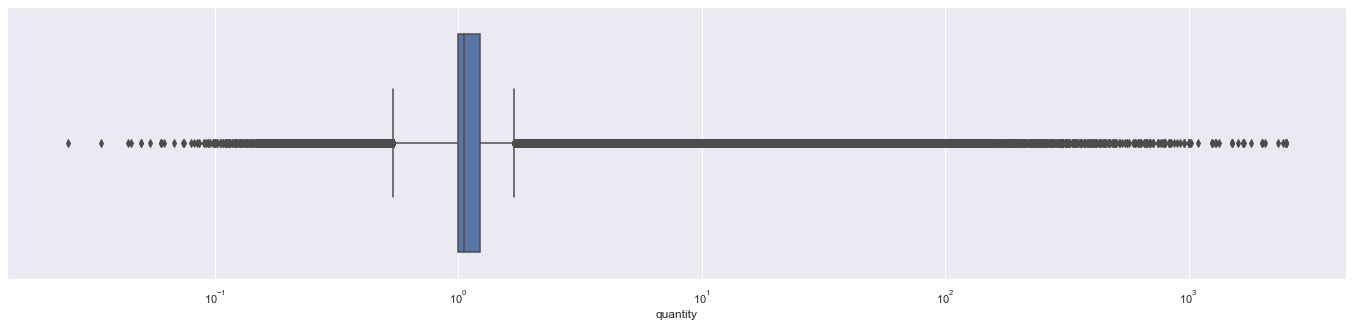

In [56]:
fig, axs = plt.subplots(figsize=(24, 5))
plt.xscale('log')
sns.boxplot(x=quantity_mean['quantity'], ax=axs, whis=2)

There is the long tail for the quantity. Lets look at this!

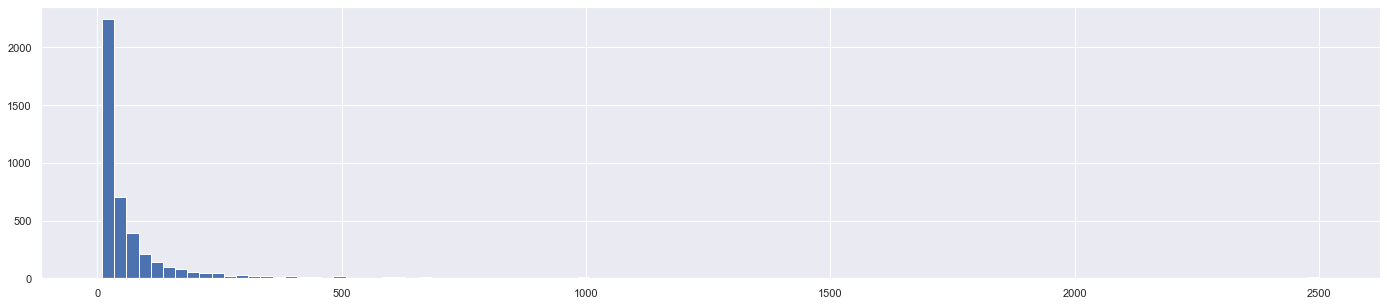

In [47]:
fig, axs = plt.subplots(figsize=(24, 5))
# plt.xscale('log')
plt.hist(quantity_mean[quantity_mean.quantity > 10], bins=100)
print()

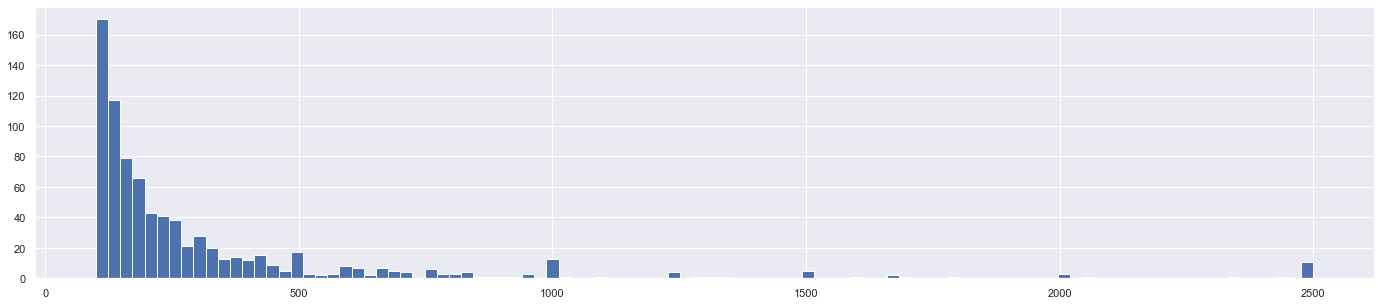

In [48]:
fig, axs = plt.subplots(figsize=(24, 5))
# plt.xscale('log')
plt.hist(quantity_mean[quantity_mean.quantity >= 100], bins=100)
print()

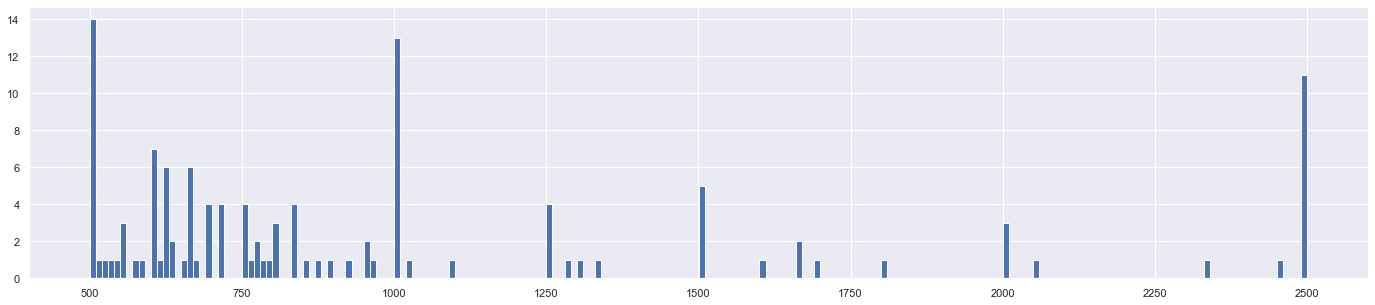

In [49]:
fig, axs = plt.subplots(figsize=(24, 5))
# plt.xscale('log')
plt.hist(quantity_mean[quantity_mean.quantity >= 500], bins=200)
print()

There is the same maximal mean for many buyers

In [60]:
df[df.id_card_int.isin(list(quantity_mean[quantity_mean.quantity >= 500].index))]

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
244979,2020-09-01 09:25:43,0,1113,-9999,1500.00,0.00,False,1409682,338672
245639,2020-09-01 09:25:43,0,21908,14025,1.00,43.00,False,1409682,338672
280484,2020-09-01 12:39:13,0,1113,-9999,5000.00,0.00,False,664126,8716900
281244,2020-09-01 12:39:13,0,24643,12518,1.00,60.00,False,664126,8716900
430215,2020-09-01 13:25:51,0,669,16860,7.19,207.07,True,396592,14372311
...,...,...,...,...,...,...,...,...,...
45808023,2020-11-30 15:57:11,0,173,12656,3.00,156.00,False,1510019,6450321
45808402,2020-11-30 21:13:48,0,1113,-9999,3900.00,0.00,False,244869,6196313
45808403,2020-11-30 21:15:12,0,1113,-9999,3000.00,0.00,False,244869,12491131
45808439,2020-11-30 21:15:12,0,1655,13698,1.00,91.00,False,244869,12491131


Sum on very large quantities is equal to 0! Lets check them!

In [59]:
df[df.quantity >= 500].describe()

,id_order,id_tov,id_kontr,quantity,sum,id_card_int,id_doc_int
count,12113.0,12113.000000,12113.0,12113.000000,12113.000000,1.211300e+04,1.211300e+04
mean,0.0,1112.923058,-9999.0,2634.426154,0.381276,8.893534e+05,1.174124e+07
std,0.0,5.987660,0.0,1743.543178,29.671098,5.250563e+05,6.749814e+06
min,0.0,647.000000,-9999.0,500.000000,0.000000,1.500000e+01,6.680000e+02
25%,0.0,1113.000000,-9999.0,1000.000000,0.000000,4.219830e+05,5.906236e+06
50%,0.0,1113.000000,-9999.0,2000.000000,0.000000,9.211500e+05,1.173086e+07
75%,0.0,1113.000000,-9999.0,5000.000000,0.000000,1.315720e+06,1.760586e+07
max,0.0,1113.000000,-9999.0,5000.000000,2313.800000,1.903646e+06,2.340845e+07


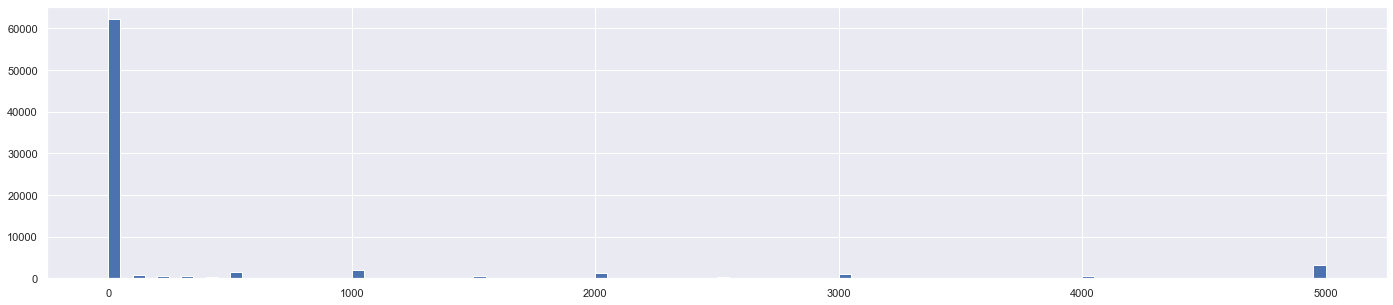

In [70]:
fig, axs = plt.subplots(figsize=(24, 5))
# plt.xscale('log')
plt.hist(df[(df['sum'] == 0)]['quantity'], bins=100)
print()

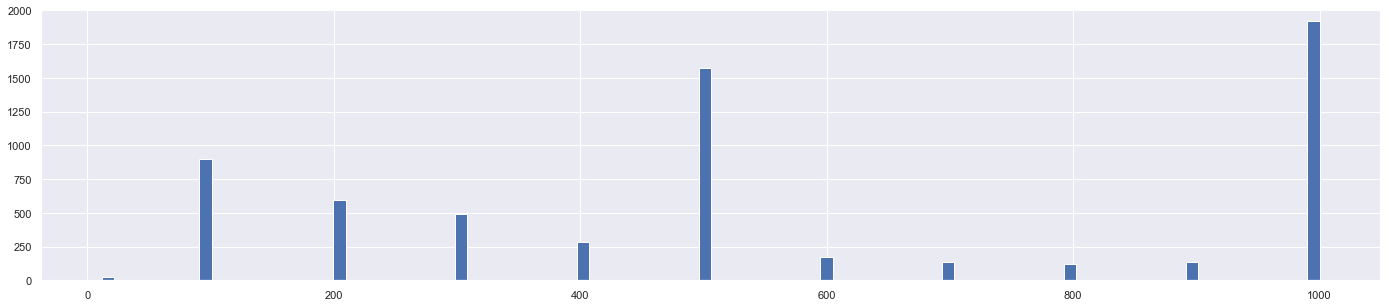

In [79]:
fig, axs = plt.subplots(figsize=(24, 5))
# plt.xscale('log')
plt.hist(df[(df['sum'] == 0) & (df['quantity'] <= 1000) & (df['quantity'] > 10)]['quantity'], bins=100)
print()

In [78]:
df[(df['sum'] == 0) & (df['quantity'] > 10)]

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
27520,2020-09-01 13:32:18,0,1113,-9999,5000.0,0.0,False,806096,21763622
37567,2020-09-01 15:53:48,0,1113,-9999,2000.0,0.0,False,1438102,4834001
43897,2020-09-01 12:51:22,0,1113,-9999,5000.0,0.0,False,72344,21320546
57565,2020-09-01 21:20:20,0,1113,-9999,5000.0,0.0,False,427981,14419056
69522,2020-09-01 11:14:28,0,1113,-9999,4000.0,0.0,False,1528414,8674916
...,...,...,...,...,...,...,...,...,...
46462107,2020-11-30 23:06:09,0,1113,-9999,5000.0,0.0,False,516678,22372786
46465112,2020-11-30 13:28:49,0,1113,-9999,1000.0,0.0,False,1147227,3186500
46470920,2020-11-30 08:54:36,0,1113,-9999,1500.0,0.0,False,1176200,2799846
46470921,2020-11-30 20:08:09,0,1113,-9999,5000.0,0.0,False,745459,3133830


<AxesSubplot:xlabel='quantity'>

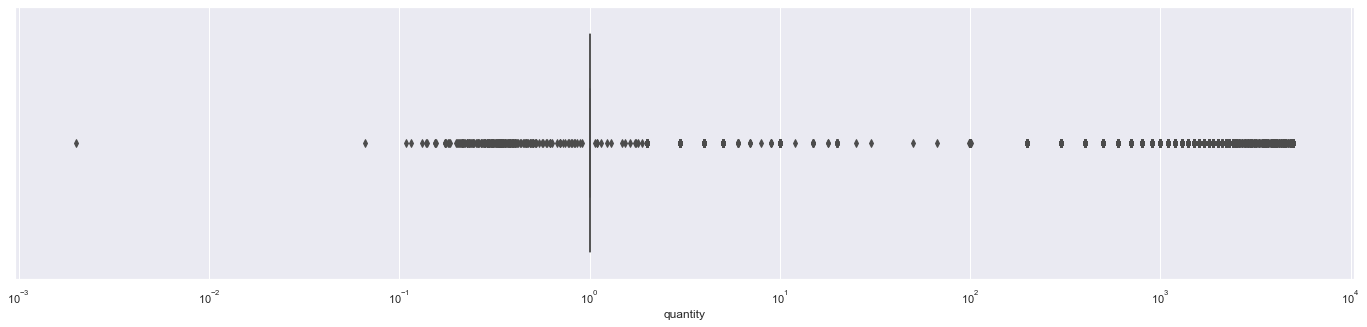

In [63]:
fig, axs = plt.subplots(figsize=(24, 5))
plt.xscale('log')
sns.boxplot(x=df[(df['sum'] == 0)]['quantity'], ax=axs, whis=2)

I think that most of these free goods with 1 quantity are kind of 3 for 2 promos. But some with large quantity and multiples of a hundred is definitely the movements between shops.
We can add them. Also it is interesting that most of this transaction are made for a few number of goods.

In [128]:
sus = df[(df['sum'] == 0) & (df['quantity'] > 30)]

In [129]:
Counter(sus .id_tov)

Counter({1113: 14362, 36247: 4, 647: 11})

In [125]:
products[products.id_tov == 1113]

,id_tov,id_group,name_group


In [126]:
products[products.id_tov == 36247]

,id_tov,id_group,name_group


In [127]:
products[products.id_tov == 647]

,id_tov,id_group,name_group
3450,647,10155,Упаковка


In [130]:
outliers[sus.id_tov != 1113]

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
32649505,2020-10-23 11:26:22,0,36247,-9999,50.0,0.0,False,86069,8890817
19165494,2020-11-13 19:59:34,0,36247,-9999,99.0,0.0,False,1026187,13681659
19165495,2020-11-13 19:52:28,0,36247,-9999,101.0,0.0,False,1469845,17807442
19165496,2020-11-13 20:10:53,0,36247,-9999,67.0,0.0,False,1861593,20063044
19569605,2020-11-13 10:22:02,0,647,-9999,100.0,0.0,False,1384910,1180933
19569611,2020-11-13 10:31:59,0,647,-9999,100.0,0.0,False,248172,3768181
19569615,2020-11-13 10:36:20,0,647,-9999,100.0,0.0,False,391534,5790329
19569634,2020-11-13 10:10:38,0,647,-9999,100.0,0.0,False,115194,12204087
19569647,2020-11-13 10:33:35,0,647,-9999,100.0,0.0,False,1681461,17062463
19569658,2020-11-13 10:27:26,0,647,-9999,100.0,0.0,False,69598,19748508


They are not exceed 100

In [133]:
outliers = df[(df['sum'] == 0) & (df['quantity'] > 30) & (df.id_tov == 1113)]

In [134]:
outliers.sort_values('date')[:50]

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
892973,2020-09-01 07:05:10,0,1113,-9999,1000.0,0.0,False,108,3476779
864122,2020-09-01 07:10:48,0,1113,-9999,3200.0,0.0,False,1422977,3567363
375639,2020-09-01 07:46:23,0,1113,-9999,500.0,0.0,False,1365522,17610011
536925,2020-09-01 08:09:14,0,1113,-9999,1500.0,0.0,False,516678,19056769
332718,2020-09-01 08:33:42,0,1113,-9999,1600.0,0.0,False,749447,15306310
356323,2020-09-01 08:47:22,0,1113,-9999,4000.0,0.0,False,851408,1830998
1187361,2020-09-01 08:53:00,0,1113,-9999,1000.0,0.0,False,1604339,17666040
425258,2020-09-01 09:08:37,0,1113,-9999,3000.0,0.0,False,1626817,13475090
244979,2020-09-01 09:25:43,0,1113,-9999,1500.0,0.0,False,1409682,338672
244980,2020-09-01 09:29:20,0,1113,-9999,300.0,0.0,False,267677,4202058


In [137]:
outliers_idxs += outliers.id_card_int.unique().tolist()

In [142]:
del outliers

In [147]:
gc.collect()

22

In [148]:
df = df[~df.id_card_int.isin(outliers_idxs)]

In [152]:
gc.collect()

22

### Step 1. Investigate negative sums and quantities

Some items has negative sums and quantities

In [154]:
len(df[df['sum'] < 0]), len(df[df['quantity'] < 0])

(69, 68)

In [155]:
df[df['sum'] < 0]

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
4206092,2020-09-04 09:10:21,0,23074,19269,1.268,-470.43,False,1301664,11939194
4206102,2020-09-04 09:09:24,0,23074,19269,1.268,-470.43,False,1419650,22549976
4210124,2020-09-04 08:37:00,0,23074,19269,1.084,-402.16,False,1035577,6745380
4218019,2020-09-04 08:43:37,0,23074,19269,0.001,-0.37,False,126995,16694740
4218021,2020-09-04 08:43:37,0,23074,19269,2.375,-881.13,False,126995,16694740
...,...,...,...,...,...,...,...,...,...
5396780,2020-09-04 08:37:49,0,23074,19269,1.236,-458.56,False,906517,2630312
5438901,2020-09-04 09:28:21,0,23074,19269,0.572,-212.21,False,1102820,21125316
5450157,2020-09-04 09:21:17,0,23074,19269,0.915,-339.47,False,574393,18763274
5450159,2020-09-04 09:21:17,0,23074,19269,0.915,-339.47,False,574393,18763274


In [156]:
df[df['quantity'] < 0]

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
4206093,2020-09-04 09:10:21,0,23074,19269,-1.268,470.43,False,1301664,11939194
4206103,2020-09-04 09:09:24,0,23074,19269,-1.268,470.43,False,1419650,22549976
4210123,2020-09-04 08:37:00,0,23074,19269,-1.084,402.16,False,1035577,6745380
4218020,2020-09-04 08:43:37,0,23074,19269,-0.001,0.37,False,126995,16694740
4218022,2020-09-04 08:43:37,0,23074,19269,-2.375,881.13,False,126995,16694740
...,...,...,...,...,...,...,...,...,...
5382631,2020-09-04 09:13:44,0,23074,19269,-0.692,256.73,False,1538576,12752264
5396781,2020-09-04 08:37:49,0,23074,19269,-1.236,458.56,False,906517,2630312
5438902,2020-09-04 09:28:21,0,23074,19269,-0.572,212.21,False,1102820,21125316
5450158,2020-09-04 09:21:17,0,23074,19269,-0.915,339.47,False,574393,18763274


They don't intersect, however

They look similar except the last one. What if we sum up `sum` and `quantity` from another?

In [164]:
Counter(df[df['sum'] < 0].id_tov)

Counter({23074: 68, 22492: 1})

In [165]:
products[products.id_tov == 23074]

,id_tov,id_group,name_group
3470,23074,10157,Экзотика


In [161]:
df[df['sum'] < 0][:-1][['sum', 'quantity']].values + df[df['quantity'] < 0][['sum', 'quantity']].values

array([[ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.

They sum up to zero. Probably it is test or some mistake that was fixed immideately. What is about the left one?

In [167]:
df[df.id_card_int == 322028][:50]

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
1254962,2020-09-01 10:27:53,0,731,17268,0.694,36.64,True,322028,14964638
1255149,2020-09-01 10:27:53,0,14842,385,1.000,58.00,False,322028,14964638
1255155,2020-09-01 10:27:53,0,14843,385,1.000,58.00,False,322028,14964638
1255635,2020-09-01 10:27:53,0,18825,12970,1.000,390.00,False,322028,14964638
1255774,2020-09-01 10:27:53,0,20171,13538,1.000,58.80,True,322028,14964638
1255775,2020-09-01 10:27:53,0,20171,13538,1.000,58.80,True,322028,14964638
1255995,2020-09-01 10:27:53,0,21901,15533,1.000,58.80,True,322028,14964638
1256153,2020-09-01 10:27:53,0,22929,16304,1.000,132.60,True,322028,14964638
1256170,2020-09-01 10:27:53,0,22976,15829,0.486,37.32,True,322028,14964638
1256713,2020-09-01 10:27:53,0,34835,15916,1.000,46.80,True,322028,14964638


Looks like normal person

In [169]:
df[df['sum'] < 0]

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
4206092,2020-09-04 09:10:21,0,23074,19269,1.268,-470.43,False,1301664,11939194
4206102,2020-09-04 09:09:24,0,23074,19269,1.268,-470.43,False,1419650,22549976
4210124,2020-09-04 08:37:00,0,23074,19269,1.084,-402.16,False,1035577,6745380
4218019,2020-09-04 08:43:37,0,23074,19269,0.001,-0.37,False,126995,16694740
4218021,2020-09-04 08:43:37,0,23074,19269,2.375,-881.13,False,126995,16694740
...,...,...,...,...,...,...,...,...,...
5396780,2020-09-04 08:37:49,0,23074,19269,1.236,-458.56,False,906517,2630312
5438901,2020-09-04 09:28:21,0,23074,19269,0.572,-212.21,False,1102820,21125316
5450157,2020-09-04 09:21:17,0,23074,19269,0.915,-339.47,False,574393,18763274
5450159,2020-09-04 09:21:17,0,23074,19269,0.915,-339.47,False,574393,18763274


In [170]:
df[df['id_card_int'] == 1301664]

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
1394861,2020-09-02 10:14:45,0,15923,21399,1.072,225.12,False,1301664,16278234
4204590,2020-09-04 09:10:21,0,16358,13403,0.684,339.26,False,1301664,11939194
4206092,2020-09-04 09:10:21,0,23074,19269,1.268,-470.43,False,1301664,11939194
4206093,2020-09-04 09:10:21,0,23074,19269,-1.268,470.43,False,1301664,11939194
4207200,2020-09-04 09:10:21,0,37095,14377,1.000,78.00,False,1301664,11939194
...,...,...,...,...,...,...,...,...,...
43287909,2020-11-28 13:03:29,0,17127,13369,1.000,65.00,False,1301664,12077103
43378568,2020-11-29 16:22:02,0,16358,12140,0.517,256.43,False,1301664,20116622
43378775,2020-11-29 16:22:02,0,17127,17618,2.000,130.00,False,1301664,20116622
43379189,2020-11-29 16:22:02,0,19120,131,1.000,35.00,False,1301664,20116622


This person is ok too

In [171]:
df[df['id_card_int'] == 1102820]

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
5438252,2020-09-04 09:28:21,0,61,271,1.00,56.00,False,1102820,21125316
5438394,2020-09-04 09:28:21,0,834,189,1.00,87.00,False,1102820,21125316
5438476,2020-09-04 09:28:21,0,15174,12283,1.00,63.00,False,1102820,21125316
5438477,2020-09-04 09:28:21,0,15175,12283,1.00,67.00,False,1102820,21125316
5438489,2020-09-04 09:28:21,0,15353,12387,1.00,29.00,False,1102820,21125316
...,...,...,...,...,...,...,...,...,...
45727394,2020-11-30 18:52:03,0,608,15563,0.25,53.25,True,1102820,18297675
45727625,2020-11-30 18:52:03,0,1045,205,1.00,30.60,True,1102820,18297675
45728727,2020-11-30 18:52:03,0,25168,17663,1.00,230.00,False,1102820,18297675
45729093,2020-11-30 18:52:03,0,36291,20895,1.00,54.00,True,1102820,18297675


And this one is ok too. So we can conclude that these negative `sum` and `quantity` are king of return back for purchases. We can left them.

### Step 2. Investigate 0 quantities

Lets see on 0 quantities

In [173]:
len(df[df['quantity'] == 0])

198

In [175]:
df[df['quantity'] == 0]

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
76223,2020-09-01 19:48:39,5588920,15738,19687,0.0,0.79,False,116224,22979294
144688,2020-09-01 17:10:48,0,28662,19687,0.0,0.89,False,1741530,5901464
1211336,2020-09-01 19:50:39,0,23008,17616,0.0,0.51,False,974892,4375162
1649328,2020-09-02 22:07:29,0,731,17268,0.0,0.14,False,145090,5928667
2013148,2020-09-02 16:28:46,0,731,21309,0.0,0.18,False,183930,7056809
...,...,...,...,...,...,...,...,...,...
2731711,2020-11-02 10:15:07,0,23129,17394,0.0,0.43,False,22599,17643443
19081941,2020-11-13 21:15:24,0,1113,-9999,0.0,0.00,False,1010794,8175342
26146848,2020-11-18 14:00:36,0,1113,-9999,0.0,0.00,False,1272759,14368148
26146849,2020-11-18 14:00:36,0,1113,-9999,0.0,0.00,False,1272759,14368148


In [182]:
df[df['id_card_int'] == 116224].head(10)

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
75006,2020-09-01 19:48:39,5588920,75,-9999,2.00,92.00,False,116224,22979294
75012,2020-09-01 19:48:39,5588920,77,-9999,1.00,52.00,False,116224,22979294
75045,2020-09-01 19:48:39,5588920,143,-9999,1.00,104.00,False,116224,22979294
75306,2020-09-01 19:48:39,5588920,488,-9999,1.08,334.49,False,116224,22979294
75646,2020-09-01 19:48:39,5588920,647,-9999,2.00,10.00,False,116224,22979294
75688,2020-09-01 19:48:39,5588920,730,15829,0.24,32.84,False,116224,22979294
75897,2020-09-01 19:48:39,5588920,12159,-9999,2.00,282.00,False,116224,22979294
76223,2020-09-01 19:48:39,5588920,15738,19687,0.00,0.79,False,116224,22979294
76473,2020-09-01 19:48:39,5588920,16963,-9999,1.00,161.00,False,116224,22979294
76536,2020-09-01 19:48:39,5588920,17243,-9999,1.00,34.00,False,116224,22979294


In [183]:
df[df['id_card_int'] == 1741530].head(10)

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
143839,2020-09-01 17:10:48,0,15374,15563,0.26,22.88,False,1741530,5901464
143994,2020-09-01 17:10:48,0,17564,12976,1.00,148.00,False,1741530,5901464
144469,2020-09-01 13:04:17,0,22884,15829,0.69,101.82,False,1741530,987547
144688,2020-09-01 17:10:48,0,28662,19687,0.00,0.89,False,1741530,5901464
144792,2020-09-01 13:04:17,0,31906,19810,1.00,124.00,False,1741530,987547
144814,2020-09-01 17:54:45,0,33232,19810,1.00,120.00,False,1741530,13220531
1531395,2020-09-02 19:36:40,0,729,17226,0.28,43.61,False,1741530,22282226
1531766,2020-09-02 19:36:40,0,17564,12976,2.00,296.00,False,1741530,22282226
1532255,2020-09-02 19:36:40,0,22884,15829,0.15,21.61,False,1741530,22282226
1532320,2020-09-02 19:36:40,0,23685,13915,1.00,111.00,False,1741530,22282226


These guys are normal. Yet another bug in the system?

It is not full list of possible outliers but I hope in the future we will catch them all!

In [187]:
with bz2.open(data_path / 'bad_ids.pkl.bz2', 'wb') as f:
    pickle.dump(outliers_idxs, f, protocol=4)